In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_csv('online_retail_II.csv.zip')

In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


In [16]:
unique_product_codes = df['StockCode'].unique()
print("고유한 제품 코드의 수:", len(unique_product_codes))

고유한 제품 코드의 수: 5305


In [23]:
print("처음 10개의 고유 제품 코드;")
print(unique_product_codes[:10])

처음 10개의 고유 제품 코드;
['85048' '79323P' '79323W' '22041' '21232' '22064' '21871' '21523' '22350'
 '22349']


In [31]:
average_price = df['Price'].mean()
print(f"Price 칼럼의 평균: {average_price}")

Price 칼럼의 평균: 4.649387727416239


In [18]:
import pandas as pd
import datetime as dt
import warnings

In [20]:
# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

In [22]:
# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# Sets a filter to ignore warnings using the 'ignore' parameter.
warnings.filterwarnings('ignore')

# Configures some display options in the pandas library.
# Uses 'None' to show all columns and rows.
# Limits decimal numbers to three digits.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month'] = df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

In [56]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,month,week,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,12/01/2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,12/01/2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,12/01/2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,12/01/2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,12/01/2009,December,Tuesday,07


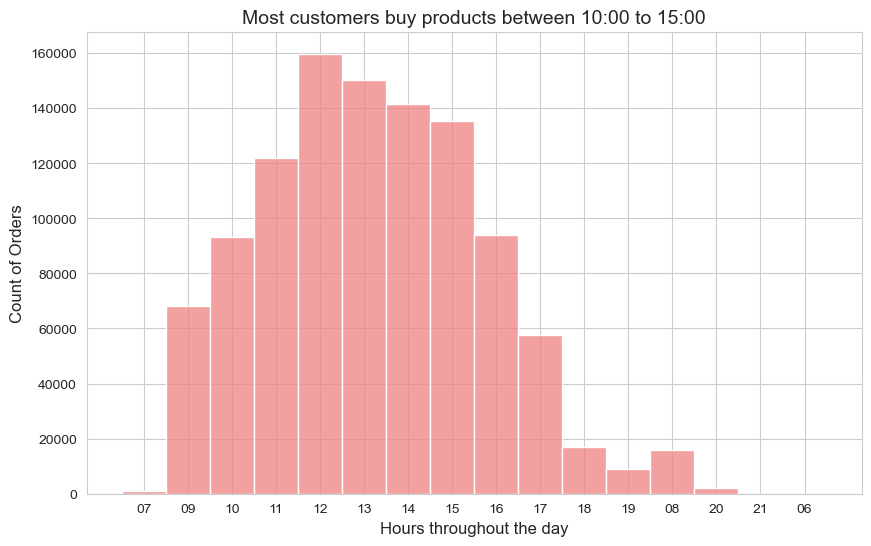

In [59]:
# 'Invoice' 컬럼에서 'C'가 포함된 데이터 (취소된 거래)를 필터링
cancel_data = df[df['Invoice'].str.contains('C', case=False)]

# '취소 데이터'의 '제품 가격(Price)', '구매 시간(InvoiceDate)', '국가(Country)' 별 특징을 분석하기 위해 필요한 컬럼을 선택합니다.
cancel_data_subset = cancel_data[['Price', 'InvoiceDate', 'Country']]

# 구매 시간을 추출하기 위해 'InvoiceDate' 컬럼에서 시간 정보만 가져옵니다.
cancel_data_subset['Time'] = pd.to_datetime(cancel_data_subset['InvoiceDate']).dt.time

# 데이터 확인
cancel_data_subset.head()

,Price,InvoiceDate,Country,Time
178,2.950,2009-12-01 10:33:00,Australia,10:33:00
179,1.650,2009-12-01 10:33:00,Australia,10:33:00
180,4.250,2009-12-01 10:33:00,Australia,10:33:00
181,2.100,2009-12-01 10:33:00,Australia,10:33:00
182,2.950,2009-12-01 10:33:00,Australia,10:33:00


### 데이터 전처리

In [174]:
# 데이터 전처리 
import pandas as pd

df = pd.read_csv('online_retail_II.csv.zip')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400,2009,12,1,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,2009,12,1,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000,2009,12,1,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800,2009,12,1,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000,2009,12,1,1


In [181]:
# 결측치 
df.isnull().sum()

Invoice              0
StockCode            0
Description       4382
Quantity             0
InvoiceDate          0
Price                0
Customer ID     243007
Country              0
TotalPrice           0
InvoiceYear          0
InvoiceMonth         0
InvoiceDay           0
InvoiceDow           0
dtype: int64

# cancel 데이터 분석

1. 연도별/월별/일별/시간대별

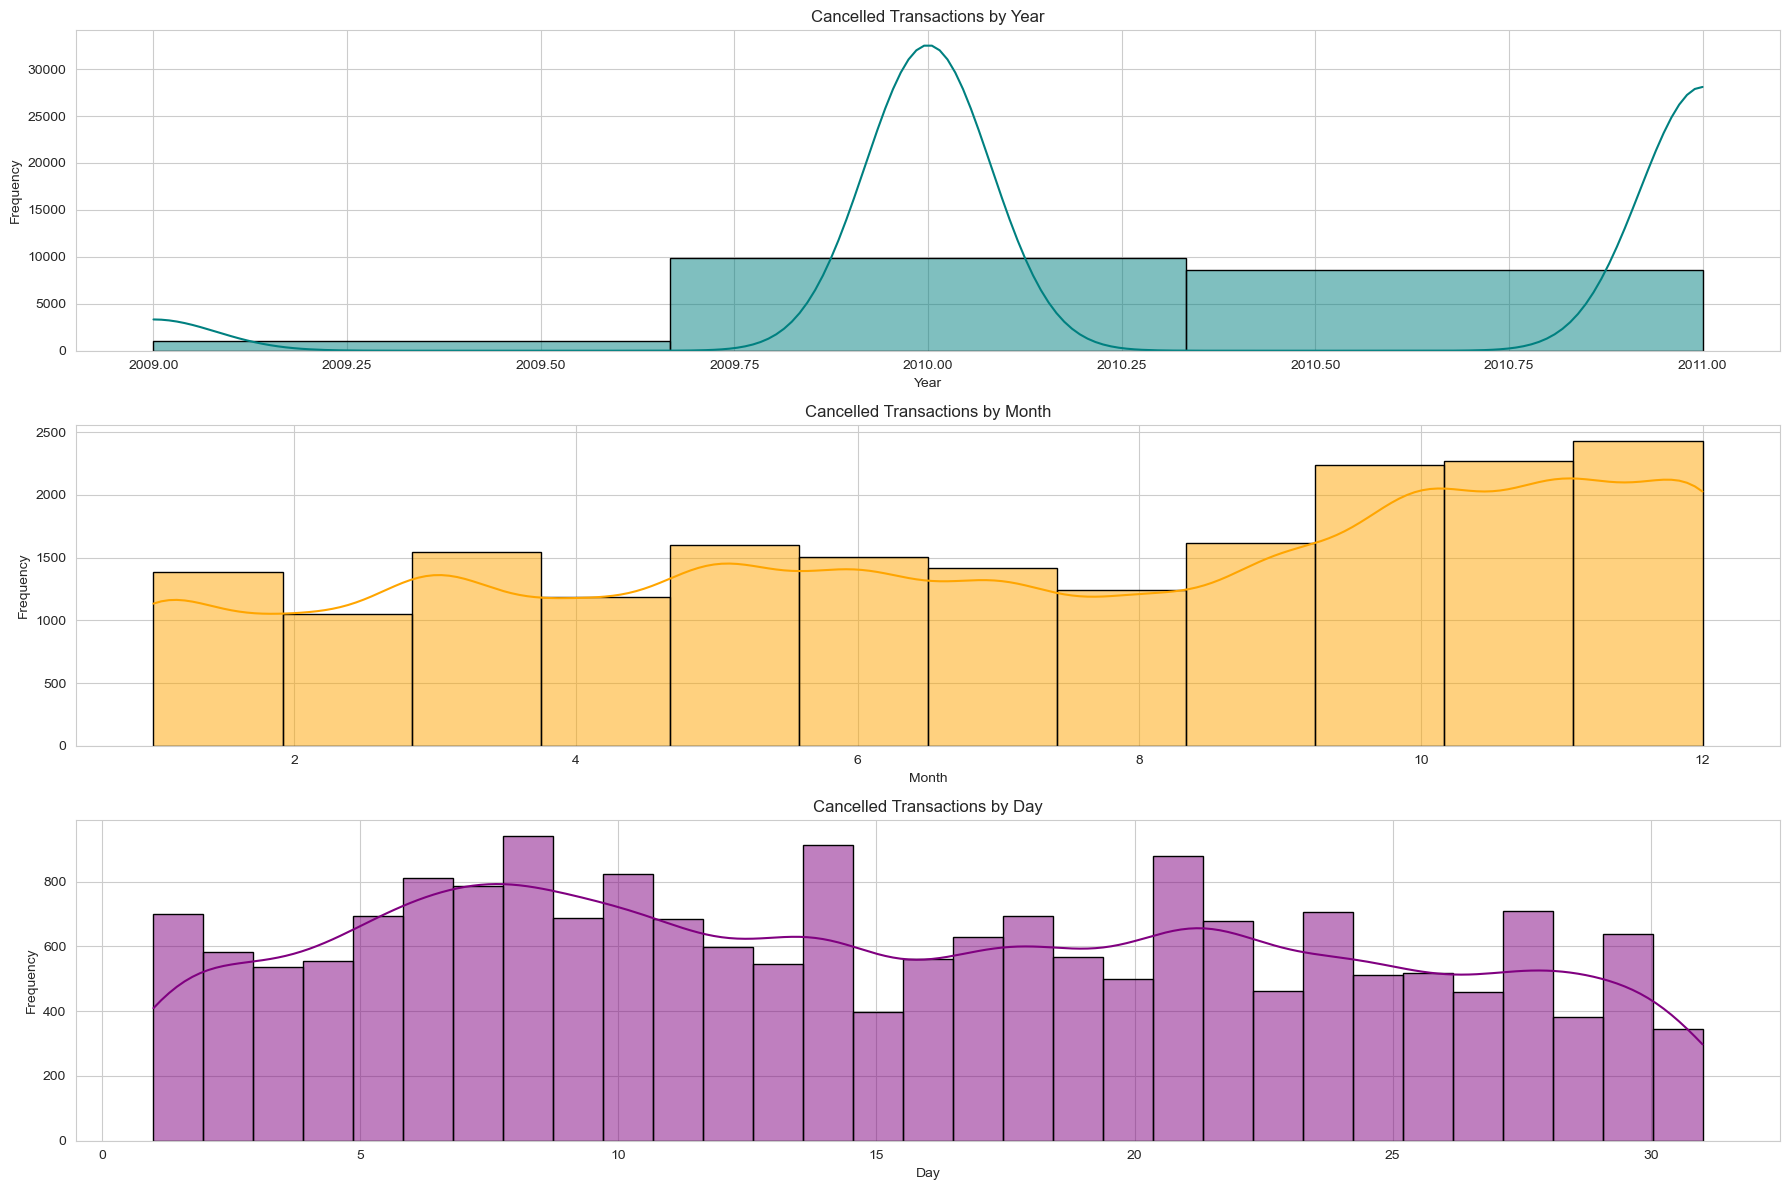

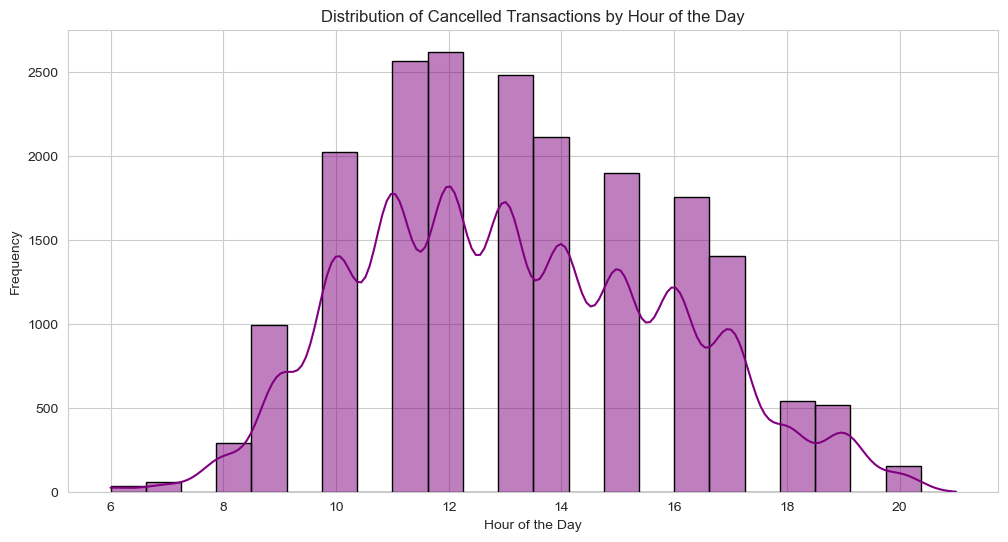

In [199]:
# 취소된 거래 데이터 추출
cancel_data = df[df['Invoice'].astype(str).str.startswith('C')]

# 필요한 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# 1. 연도별 취소된 거래 빈도 시각화
plt.subplot(3, 1, 1)
sns.histplot(data=cancel_data, x='InvoiceYear', bins=len(cancel_data['InvoiceYear'].unique()), kde=True, color='teal', edgecolor='black')
plt.title('Cancelled Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)

# 2. 월별 취소된 거래 빈도 시각화
plt.subplot(3, 1, 2)
sns.histplot(data=cancel_data, x='InvoiceMonth', bins=12, kde=True, color='orange', edgecolor='black')
plt.title('Cancelled Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)

# 3. 일별 취소된 거래 빈도 시각화
plt.subplot(3, 1, 3)
sns.histplot(data=cancel_data, x='InvoiceDay', bins=31, kde=True, color='purple', edgecolor='black')
plt.title('Cancelled Transactions by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# 시간대별로 취소된 거래의 분포를 분석하기 위해 'InvoiceDate'에서 시간을 추출합니다.
cancel_data['InvoiceHour'] = cancel_data['InvoiceDate'].dt.hour

plt.figure(figsize=(12, 6))

# 시간대별 취소된 거래 빈도 시각화 (새로운 스타일)
sns.histplot(data=cancel_data, x='InvoiceHour', bins=24, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Cancelled Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

2. cancel 데이터의 매출액

In [213]:
# 1. 취소된 데이터의 매출액 총합
cancel_total_price = cancel_data['TotalPrice'].sum()

# 2. 전체 데이터의 (cancel 건을 제외한) 매출액 총합
total_price = df['TotalPrice'].sum()

cancel_total_price, total_price

(-1526667.86, 19287250.56799999)

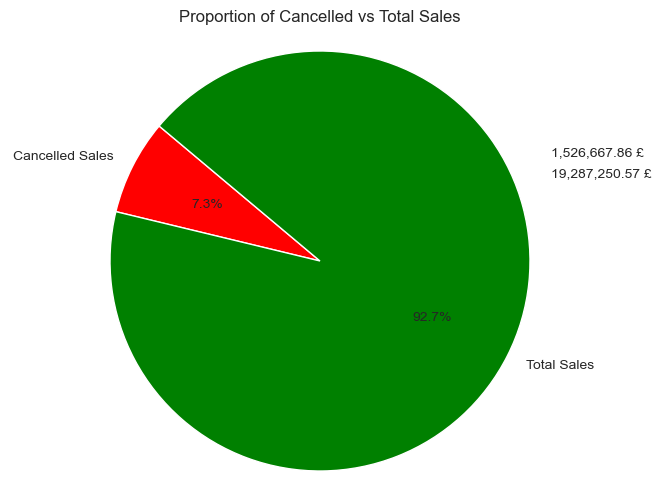

(1526667.86, 19287250.56799999, 20813918.42799999)

In [215]:
# cancel 데이터의 매출액이 전체 매출액에서 차지하는 비율
# 1. 취소된 데이터의 'TotalPrice' 합계 구하고 절댓값으로 표시
cancel_total_price_abs = abs(cancel_data['TotalPrice'].sum())

# 2. 전체 데이터의 'TotalPrice' 합
total_price = df['TotalPrice'].sum()

# 3. 1번과 2번의 값을 더한 뒤, 각 비율을 시각화하는 코드
import matplotlib.pyplot as plt

# 합계 계산
total_sum = cancel_total_price_abs + total_price

# 카테고리별 비율 데이터 준비
price_data = {
    'Category': ['Cancelled Sales', 'Total Sales'],
    'TotalPrice': [cancel_total_price_abs, total_price]
}

# 시각화 준비
plt.figure(figsize=(8, 6))
colors = ['red', 'green']

# 파이 차트 시각화
plt.pie(price_data['TotalPrice'], labels=price_data['Category'], autopct='%1.1f%%', colors=colors, startangle=140)

# 각 값에 숫자를 표시하고 파운드 기호 추가
for i, value in enumerate(price_data['TotalPrice']):
    plt.annotate(f'{value:,.2f} £', xy=(1, 0.5-i*0.1), xytext=(1.1, 0.5-i*0.1))

plt.title('Proportion of Cancelled vs Total Sales')
plt.axis('equal')  # 파이 차트를 원형으로 표시

# 그래프 출력
plt.show()

cancel_total_price_abs, total_price, total_sum

### cancel 데이터의 고객(Invoice)별 평균 지불 가격Price) 

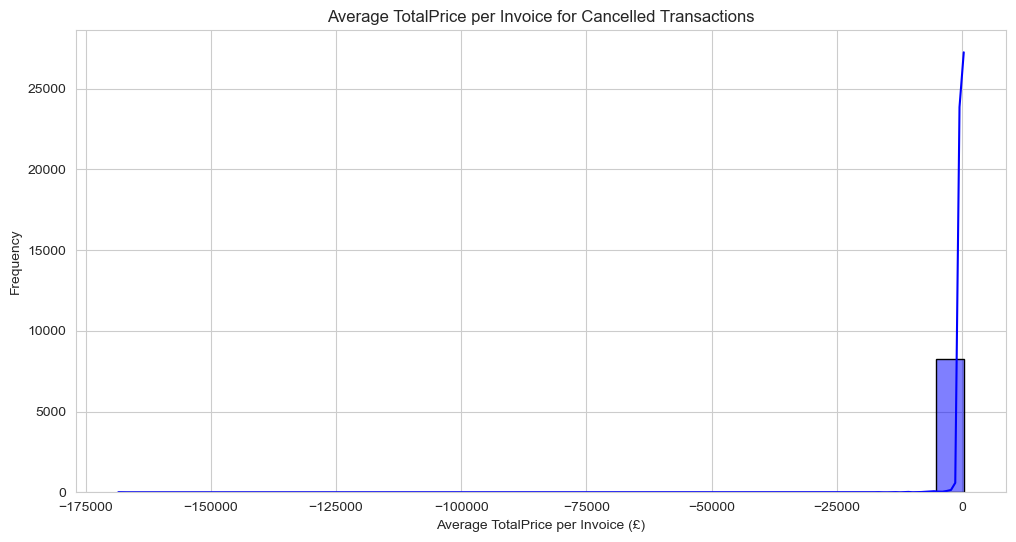

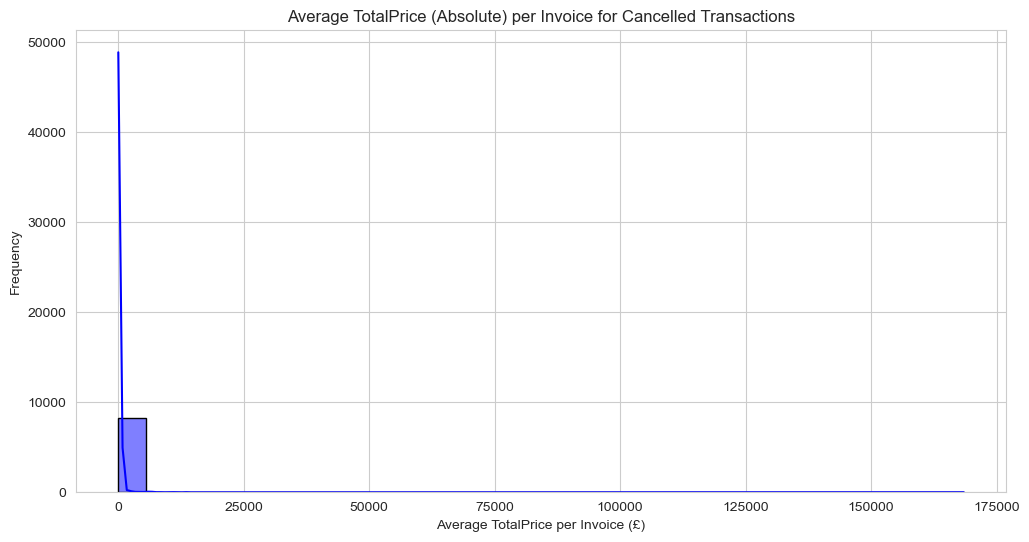

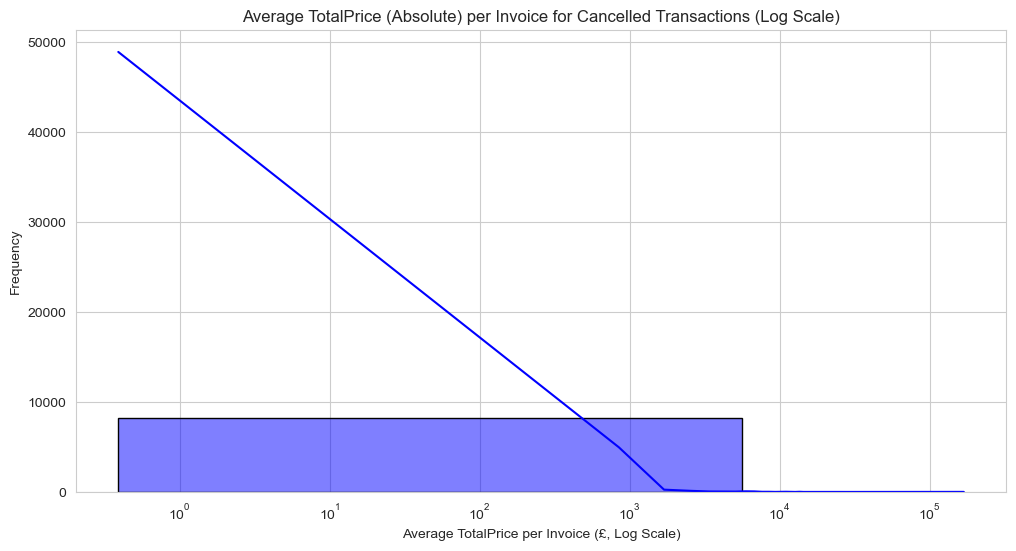

In [223]:
# 'Invoice'별로 그룹화하여 취소된 거래의 평균 'TotalPrice' 계산
cancel_avg_totalprice_by_invoice = cancel_data.groupby('Invoice')['TotalPrice'].mean()

# 시각화 준비
plt.figure(figsize=(12, 6))

# 히스토그램을 이용해 'Invoice'별 평균 'TotalPrice'의 분포 시각화
sns.histplot(cancel_avg_totalprice_by_invoice, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Average TotalPrice per Invoice for Cancelled Transactions')
plt.xlabel('Average TotalPrice per Invoice (£)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()

cancel_avg_totalprice_by_invoice.head()

# 'Invoice'별로 그룹화하여 취소된 거래의 평균 'TotalPrice' 계산 (절댓값 처리)
cancel_avg_totalprice_abs_by_invoice = cancel_avg_totalprice_by_invoice.abs()

# 시각화 준비
plt.figure(figsize=(12, 6))

# 히스토그램을 이용해 'Invoice'별 평균 'TotalPrice'의 절댓값 분포 시각화
sns.histplot(cancel_avg_totalprice_abs_by_invoice, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Average TotalPrice (Absolute) per Invoice for Cancelled Transactions')
plt.xlabel('Average TotalPrice per Invoice (£)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()

cancel_avg_totalprice_abs_by_invoice.head()

# 시각화 준비 (x축을 로그 스케일로 변환)
plt.figure(figsize=(12, 6))

# 히스토그램을 이용해 'Invoice'별 평균 'TotalPrice'의 절댓값 분포 시각화 (로그 스케일 적용)
sns.histplot(cancel_avg_totalprice_abs_by_invoice, bins=30, kde=True, color='blue', edgecolor='black')
plt.xscale('log')
plt.title('Average TotalPrice (Absolute) per Invoice for Cancelled Transactions (Log Scale)')
plt.xlabel('Average TotalPrice per Invoice (£, Log Scale)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()

### cancel 데이터의 특징들

In [115]:
# cancel_data와 'Description' 컬럼을 함께 보기 위해 필요한 컬럼들을 선택합니다.
cancel_data_with_description = cancel_data[['Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Customer ID', 'Country']]

# 상위 5개의 데이터를 확인합니다.
cancel_data_with_description.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2.950,16321.000,Australia


### cancel 제품 TOP 10

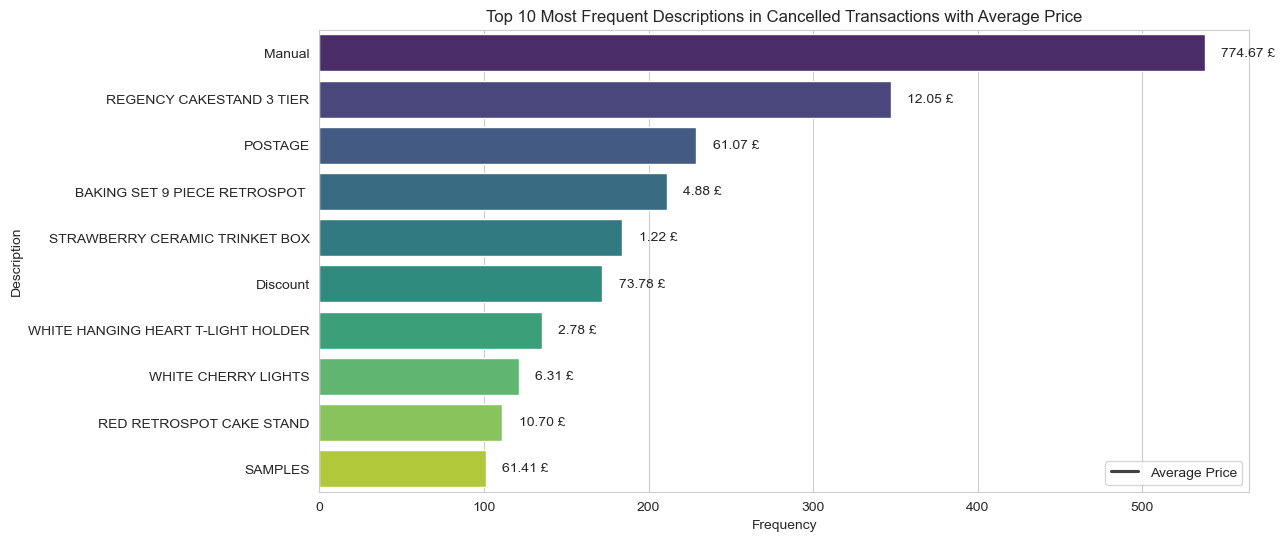

In [231]:
# 취소된 데이터 중 'Description'별 빈도 계산
cancel_description_counts = cancel_data['Description'].value_counts()

# 상위 10개 'Description' 추출
top_10_cancel_descriptions = cancel_description_counts.head(10)

top_10_cancel_descriptions

# 상위 10개 취소된 'Description'의 평균 단가 계산
top_10_descriptions_with_price = cancel_data[cancel_data['Description'].isin(top_10_cancel_descriptions.index)][['Description', 'Price']]
top_10_descriptions_avg_price = top_10_descriptions_with_price.groupby('Description')['Price'].mean().reindex(top_10_cancel_descriptions.index)

# 시각화 준비 (빈도와 평균 단가를 동시에 표시)
plt.figure(figsize=(12, 6))

# 빈도와 평균 단가를 함께 시각화
sns.barplot(x=top_10_cancel_descriptions.values, y=top_10_cancel_descriptions.index, palette='viridis', label='Frequency')
for i, (count, avg_price) in enumerate(zip(top_10_cancel_descriptions.values, top_10_descriptions_avg_price)):
    plt.text(count + 10, i, f'{avg_price:.2f} £', va='center')

plt.title('Top 10 Most Frequent Descriptions in Cancelled Transactions with Average Price')
plt.xlabel('Frequency')
plt.ylabel('Description')
plt.legend(['Average Price'])

# 그래프 출력
plt.show()

### cancel 데이터의 가격 분포

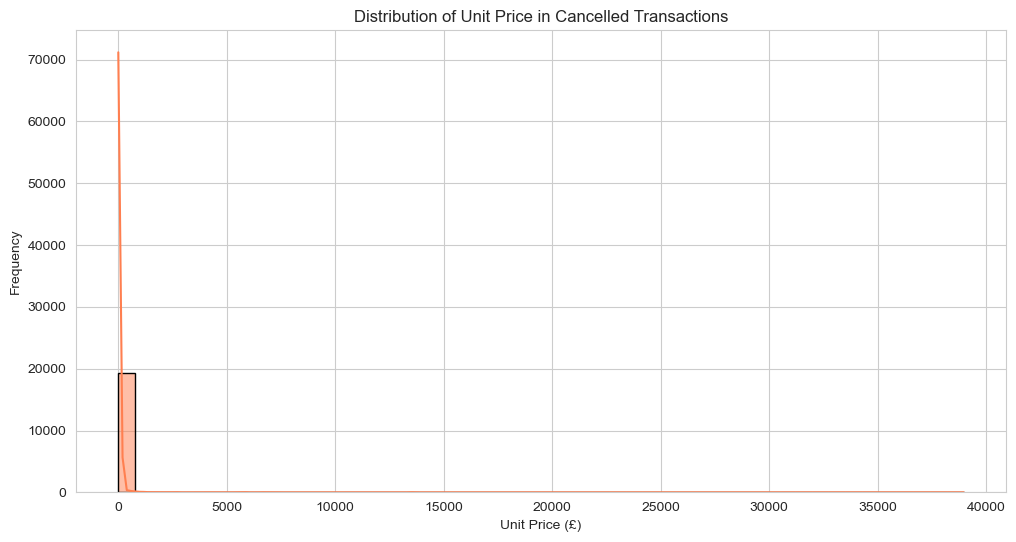

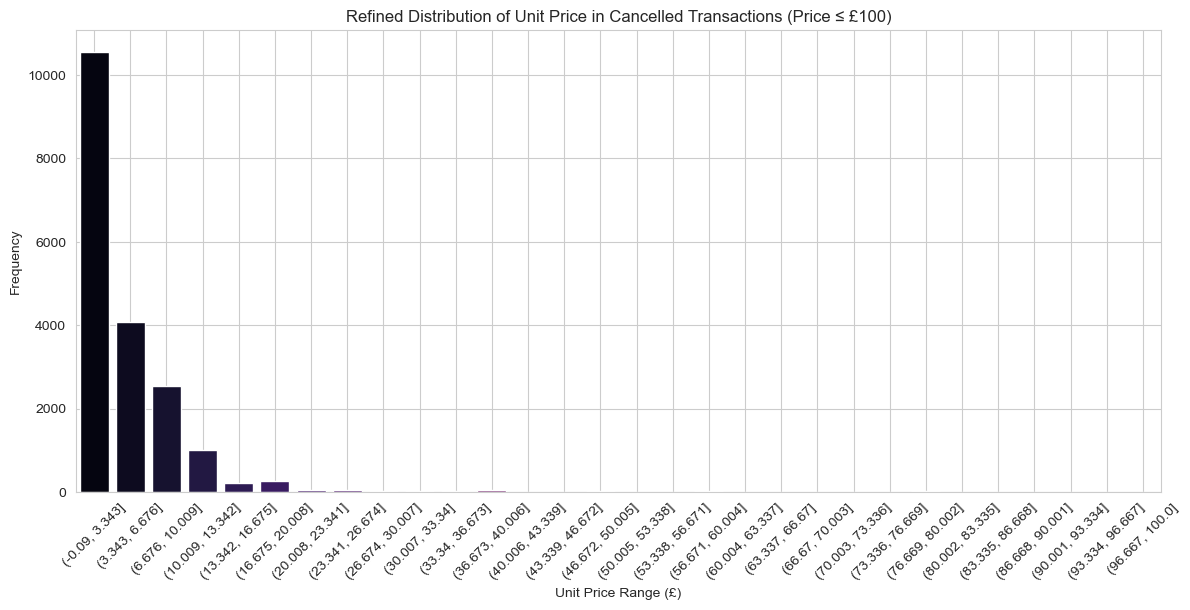

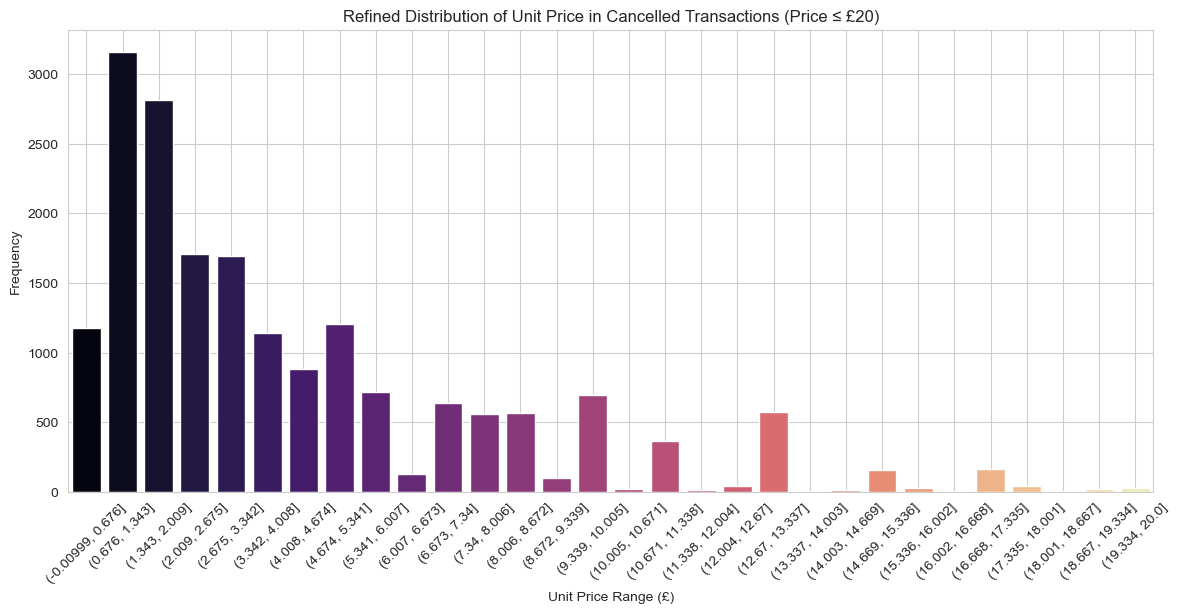

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 취소된 거래의 개별 단가('Price')의 분포를 알아보기 위한 시각화 준비
plt.figure(figsize=(12, 6))

# 히스토그램을 이용해 취소된 거래의 개별 단가('Price') 분포 시각화
sns.histplot(cancel_data['Price'], bins=50, kde=True, color='coral', edgecolor='black')
plt.title('Distribution of Unit Price in Cancelled Transactions')
plt.xlabel('Unit Price (£)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()

# 시각화 준비 (x축 단가 범위를 좁혀서 표현)
plt.figure(figsize=(14, 6))

# 단가의 특정 범위 (예: £0 - £100)로 제한하여 분포 시각화
unit_price_bins_limited = pd.cut(cancel_data[cancel_data['Price'] <= 100]['Price'], bins=30).value_counts().sort_index()
sns.barplot(x=unit_price_bins_limited.index.astype(str), y=unit_price_bins_limited.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Refined Distribution of Unit Price in Cancelled Transactions (Price ≤ £100)')
plt.xlabel('Unit Price Range (£)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()

# 시각화 준비 (더 좁은 단가 범위로 표현)
plt.figure(figsize=(14, 6))

# 단가의 특정 범위 (예: £0 - £20)로 제한하여 분포 시각화
unit_price_bins_narrow = pd.cut(cancel_data[cancel_data['Price'] <= 20]['Price'], bins=30).value_counts().sort_index()
sns.barplot(x=unit_price_bins_narrow.index.astype(str), y=unit_price_bins_narrow.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Refined Distribution of Unit Price in Cancelled Transactions (Price ≤ £20)')
plt.xlabel('Unit Price Range (£)')
plt.ylabel('Frequency')
plt.grid(True)

# 그래프 출력
plt.show()


### cancel 데이터의 국가 분포

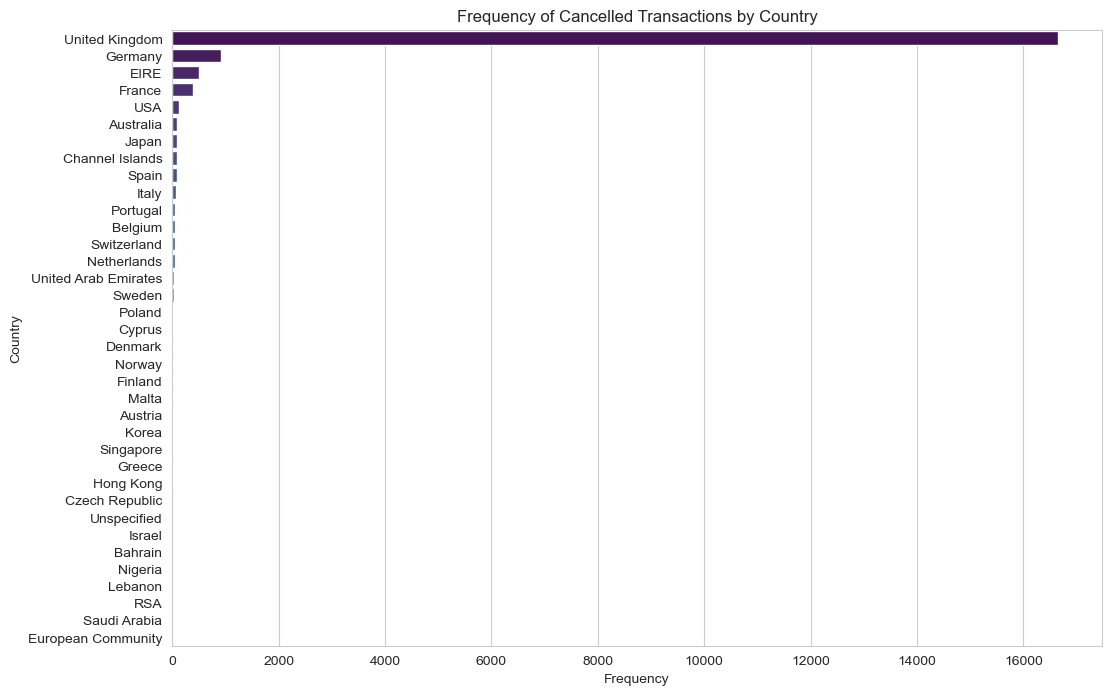

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 준비
plt.figure(figsize=(12, 8))

# 국가별 취소된 거래 빈도 분포를 시각화
sns.countplot(y='Country', data=cancel_data, order=cancel_data['Country'].value_counts().index, palette='viridis')
plt.title('Frequency of Cancelled Transactions by Country')
plt.xlabel('Frequency')
plt.ylabel('Country')

plt.show()

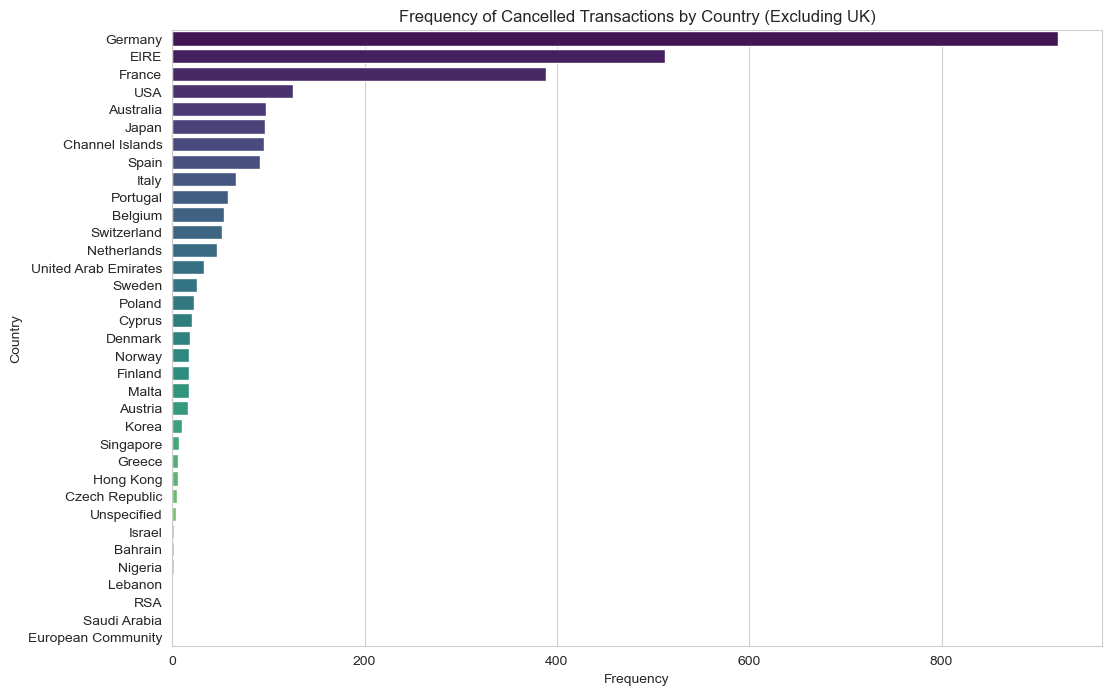

In [120]:
# 영국을 제외한 국가별 cancel 데이터 빈도표 추출
cancel_data_no_uk = cancel_data[cancel_data['Country'] != 'United Kingdom']

# 시각화 준비
plt.figure(figsize=(12, 8))

# 국가별 취소된 거래 빈도 분포 시각화 (영국 제외)
sns.countplot(y='Country', data=cancel_data_no_uk, order=cancel_data_no_uk['Country'].value_counts().index, palette='viridis')
plt.title('Frequency of Cancelled Transactions by Country (Excluding UK)')
plt.xlabel('Frequency')
plt.ylabel('Country')

plt.show()

# 고가 제품 위주의 마케팅 전략

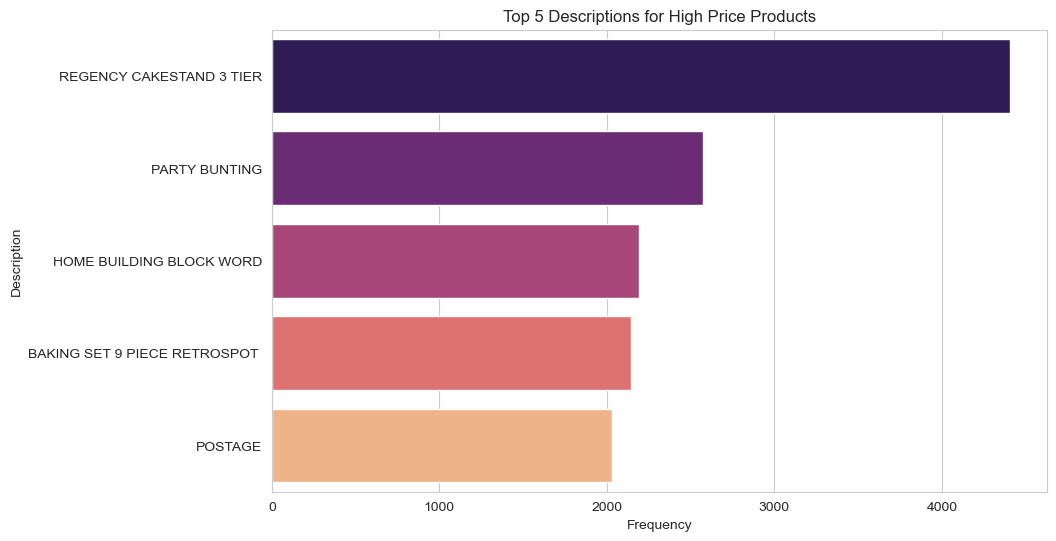

,Country,InvoiceDate,Invoice,Description
0,United Kingdom,2009-12-01 07:45:00,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,United Kingdom,2009-12-01 07:45:00,489434,PINK CHERRY LIGHTS
2,United Kingdom,2009-12-01 07:45:00,489434,WHITE CHERRY LIGHTS
7,United Kingdom,2009-12-01 07:45:00,489434,FANCY FONT HOME SWEET HOME DOORMAT
12,United Kingdom,2009-12-01 09:06:00,489436,DOOR MAT BLACK FLOCK


In [169]:
price_threshold = df['Price'].quantile(0.75)
high_price_invoices = df[df['Price'] > price_threshold]

# 2. 높은 가격대의 'Description' 중 중복 빈도가 높은 순서로 Top 5를 추출합니다.
top_5_high_price_descriptions = high_price_invoices['Description'].value_counts().head(5)

# 시각화 준비
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_high_price_descriptions.values, y=top_5_high_price_descriptions.index, palette='magma')
plt.title('Top 5 Descriptions for High Price Products')
plt.xlabel('Frequency')
plt.ylabel('Description')

# 그래프 출력
plt.show()

# 3. 높은 가격대의 'Description'을 구매한 'Country', 'InvoiceDate', 'Invoice' 정보를 추출합니다.
high_price_description_details = high_price_invoices[['Country', 'InvoiceDate', 'Invoice', 'Description']]

# 결과 확인
high_price_description_details.head()